In [1]:
import os, shutil
first_dataset_dir = '../datasets/train1'
second_dataset_dir = '../datasets/train2'
third_dataset_dir = '../datasets/train3'
fourth_dataset_dir = '../datasets/train4'
fifth_dataset_dir = '../datasets/train5'
test_dataset_dir = '../datasets/test'

In [2]:
from keras.utils import image_dataset_from_directory
IMG_SIZE = 32

train_ds1 = image_dataset_from_directory(first_dataset_dir, image_size=(IMG_SIZE, IMG_SIZE), batch_size=32, label_mode='categorical')
# 6 % 5 + 1 = 2
val_ds2 = image_dataset_from_directory(second_dataset_dir, image_size=(IMG_SIZE, IMG_SIZE), batch_size=32, label_mode='categorical')
train_ds3 = image_dataset_from_directory(third_dataset_dir, image_size=(IMG_SIZE, IMG_SIZE), batch_size=32, label_mode='categorical')
train_ds4 = image_dataset_from_directory(fourth_dataset_dir, image_size=(IMG_SIZE, IMG_SIZE), batch_size=32, label_mode='categorical')
train_ds5 = image_dataset_from_directory(fifth_dataset_dir, image_size=(IMG_SIZE, IMG_SIZE), batch_size=32, label_mode='categorical')
test_ds = image_dataset_from_directory(test_dataset_dir, image_size=(IMG_SIZE, IMG_SIZE), batch_size=32, label_mode='categorical')

Found 10000 files belonging to 10 classes.
Found 10000 files belonging to 10 classes.
Found 10000 files belonging to 10 classes.
Found 10000 files belonging to 10 classes.
Found 10000 files belonging to 10 classes.
Found 10000 files belonging to 10 classes.


In [3]:
print (type(train_ds1))
print (train_ds1.class_names)

full_train_ds = train_ds1.concatenate(train_ds3).concatenate(train_ds4).concatenate(train_ds5)

# Even if we switch datatypes back to the original
# Methods like class_names are not available
# So we keep it as "concatenated dataset" instead of "prefetch dataset"
# full_train_ds = full_train_ds.prefetch(buffer_size=tf.data.AUTOTUNE)
# print (full_train_ds.class_names)
print (type(full_train_ds))

<class 'tensorflow.python.data.ops.prefetch_op._PrefetchDataset'>
['000_airplane', '001_automobile', '002_bird', '003_cat', '004_deer', '005_dog', '006_frog', '007_horse', '008_ship', '009_truck']
<class 'tensorflow.python.data.ops.concatenate_op._ConcatenateDataset'>


In [4]:
for data_batch, labels_batch in full_train_ds:
    print('data batch shape:', data_batch.shape)
    print('labels batch shape:', labels_batch.shape)
    break

data batch shape: (32, 32, 32, 3)
labels batch shape: (32, 10)


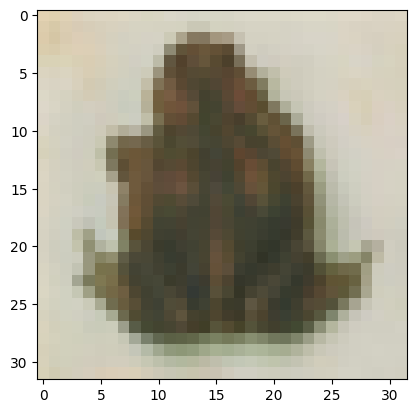

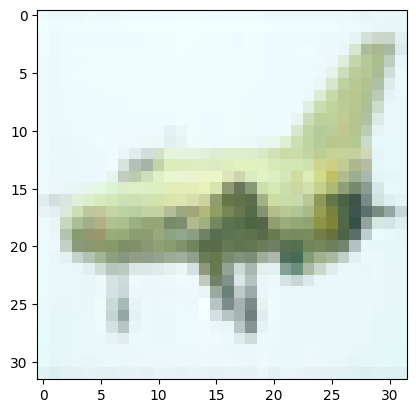

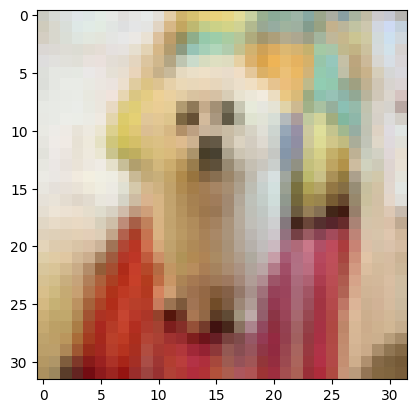

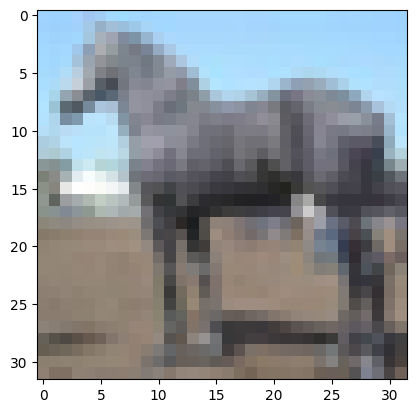

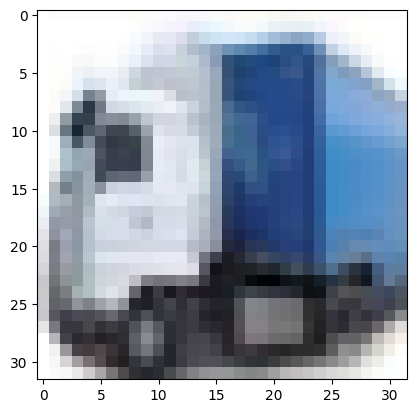

In [5]:
import matplotlib.pyplot as plt
for data_batch, _ in full_train_ds.take(1):
  for i in range(5):
    plt.imshow(data_batch[i].numpy().astype("uint8"))
    plt.show()

DATA AUGMENTATION:

In [6]:
from tensorflow import keras 
from keras import layers
data_augmentation = keras.Sequential( 
  [
    layers.RandomFlip("horizontal"), 
    layers.RandomRotation(0.1), 
    layers.RandomZoom(0.2),
  ] 
)

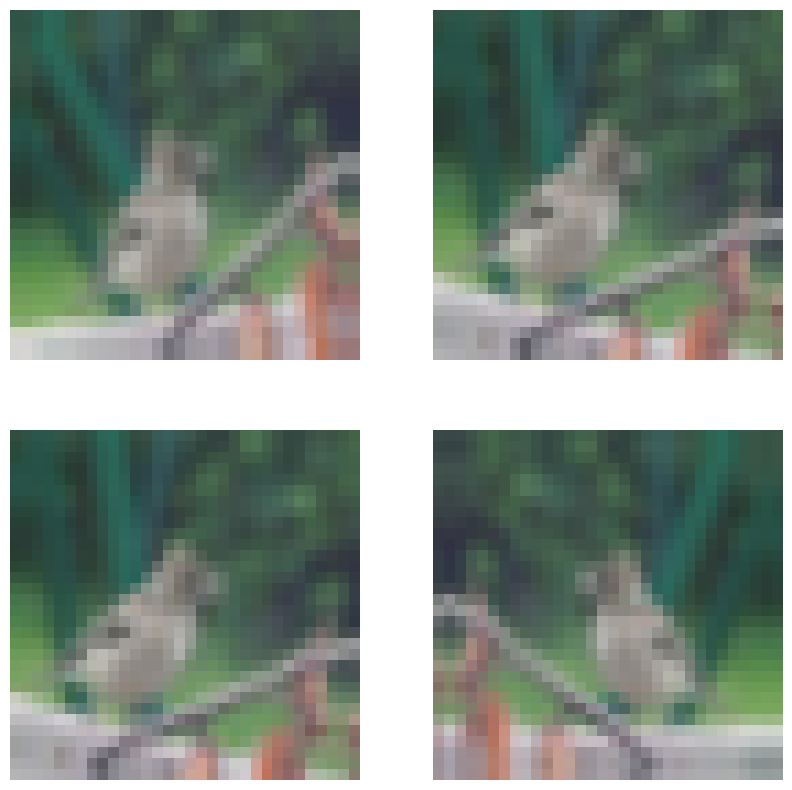

In [9]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 10))
for images, _ in full_train_ds.take(1):
  for i in range(4):
    augmented_images = data_augmentation(images)
    ax = plt.subplot(2, 2, i + 1) 
    plt.imshow(augmented_images[0].numpy().astype("uint8")) 
    plt.axis("off")

In [10]:
from tensorflow import keras
from keras import layers
from keras import models
inputs = keras.Input(shape=(IMG_SIZE, IMG_SIZE, 3))
x = data_augmentation(inputs)
x = layers.Rescaling(1./255)(inputs)
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
#image size too sort to add another layer
#x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
#x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Flatten()(x)
x = layers.Dropout(0.5)(x)
x = layers.Dense(512, activation="relu")(x)
outputs = layers.Dense(10, activation="sigmoid")(x)
model = keras.Model(inputs=inputs, outputs=outputs)

In [11]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 rescaling (Rescaling)       (None, 32, 32, 3)         0         
                                                                 
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 15, 15, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                        

TESTING DIFERENT OTIMIZERS:

1 - RMSprop

In [12]:
import tensorflow as tf
model.compile(loss='categorical_crossentropy', 
              optimizer=tf.keras.optimizers.RMSprop(learning_rate=1e-4), 
              metrics=['acc'])


In [13]:
history = model.fit(full_train_ds, 
                    epochs=30, 
                    validation_data=val_ds2)

Epoch 1/30
1252/1252 [==============================] - 10s 8ms/step - loss: 1.9727 - acc: 0.2729 - val_loss: 1.7607 - val_acc: 0.3603
Epoch 2/30
1252/1252 [==============================] - 11s 9ms/step - loss: 1.6864 - acc: 0.3850 - val_loss: 1.5915 - val_acc: 0.4208
Epoch 3/30
1252/1252 [==============================] - 11s 9ms/step - loss: 1.5604 - acc: 0.4316 - val_loss: 1.4782 - val_acc: 0.4693
Epoch 4/30
1252/1252 [==============================] - 10s 8ms/step - loss: 1.4715 - acc: 0.4662 - val_loss: 1.4139 - val_acc: 0.4923
Epoch 5/30
1252/1252 [==============================] - 11s 9ms/step - loss: 1.4013 - acc: 0.4962 - val_loss: 1.3583 - val_acc: 0.5204
Epoch 6/30
1252/1252 [==============================] - 11s 9ms/step - loss: 1.3415 - acc: 0.5192 - val_loss: 1.3047 - val_acc: 0.5382
Epoch 7/30
1252/1252 [==============================] - 11s 9ms/step - loss: 1.2922 - acc: 0.5363 - val_loss: 1.2754 - val_acc: 0.5395
Epoch 8/30
1252/1252 [==============================] -

RESULTS:

With optimizer RMSdrop we got the following training metrics loss: 0.8479 - acc: 0.7034 - val_loss: 0.8741 - val_acc: 0.6949

TESTING DIFERENT OTIMIZERS:

2 - ADAM

In [14]:
import tensorflow as tf
model.compile(loss='categorical_crossentropy', 
              optimizer="adam",
              metrics=['acc'])


In [15]:
history = model.fit(full_train_ds, 
                    epochs=30, 
                    validation_data=val_ds2)

Epoch 1/30
1252/1252 [==============================] - 12s 10ms/step - loss: 1.0938 - acc: 0.6166 - val_loss: 0.9736 - val_acc: 0.6608
Epoch 2/30
1252/1252 [==============================] - 12s 9ms/step - loss: 1.0095 - acc: 0.6439 - val_loss: 0.9255 - val_acc: 0.6749
Epoch 3/30
1252/1252 [==============================] - 11s 9ms/step - loss: 0.9439 - acc: 0.6676 - val_loss: 0.9345 - val_acc: 0.6680
Epoch 4/30
1252/1252 [==============================] - 12s 9ms/step - loss: 0.8893 - acc: 0.6871 - val_loss: 0.9296 - val_acc: 0.6792
Epoch 5/30
1252/1252 [==============================] - 12s 10ms/step - loss: 0.8402 - acc: 0.7051 - val_loss: 0.8513 - val_acc: 0.7055
Epoch 6/30
1252/1252 [==============================] - 12s 9ms/step - loss: 0.7931 - acc: 0.7209 - val_loss: 0.8085 - val_acc: 0.7149
Epoch 7/30
1252/1252 [==============================] - 11s 9ms/step - loss: 0.7651 - acc: 0.7299 - val_loss: 0.8142 - val_acc: 0.7156
Epoch 8/30
1252/1252 [==============================]

RESULTS for ADAM optimizer -> loss: 0.4422 - acc: 0.8424 - val_loss: 0.7703 - val_acc: 0.7485
